In [6]:
import os
import random
random.seed(42) 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Inline plots in Jupyter notebooks
%matplotlib inline

# better display of review text in dataframes
pd.set_option('display.max_colwidth', -1) 

# Seaborn style
sns.set(style="whitegrid")

# Load pickle files

In [2]:
PICKLE_DIR = 'pickle'

allocine_df = pd.DataFrame()

files = [file for file in os.listdir(PICKLE_DIR) if file.endswith(".pickle")]
files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

for file in files:
    path = os.path.join(PICKLE_DIR, file)
    print("Reading file: " + path)
    df = pd.read_pickle(path)
    allocine_df = allocine_df.append(df, ignore_index=True)
    
print()
print("Loaded {} reviews !".format(len(allocine_df)))

Reading file: pickle/allocine_0.pickle
Reading file: pickle/allocine_1.pickle
Reading file: pickle/allocine_2.pickle
Reading file: pickle/allocine_3.pickle
Reading file: pickle/allocine_4.pickle
Reading file: pickle/allocine_5.pickle
Reading file: pickle/allocine_6.pickle
Reading file: pickle/allocine_7.pickle
Reading file: pickle/allocine_8.pickle
Reading file: pickle/allocine_9.pickle
Reading file: pickle/allocine_10.pickle
Reading file: pickle/allocine_11.pickle
Reading file: pickle/allocine_12.pickle
Reading file: pickle/allocine_13.pickle
Reading file: pickle/allocine_14.pickle
Reading file: pickle/allocine_15.pickle
Reading file: pickle/allocine_16.pickle
Reading file: pickle/allocine_17.pickle
Reading file: pickle/allocine_18.pickle
Reading file: pickle/allocine_19.pickle
Reading file: pickle/allocine_20.pickle

Loaded 384079 reviews !


# Explore data

In [3]:
allocine_df.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
53894,http://www.allocine.fr/film/fichefilm-111632/critiques/spectateurs,1.0,"Sans grande surprise, le premier opus de la franchise (il en existe trois actuellement) est dépourvu d’originalité et d’un quelconque intérêt. Sexy Dance (2006) est ultra conventionnel, prévisible au bout de dix minutes et pour un film qui avoisine les 105 minutes, il y en a clairement 45 en trop, entre les répétitions inutiles, les séquences musicales et de danses à rallonges, les répliques mièvres, les disputes et les réconciliations, bref, une sortie en DTV aurait largement suffit ! Espérons que le second volet (2008) et le troisième (2010) seront relever le niveau.",2010-09-21,1,1
366314,http://www.allocine.fr/film/fichefilm-209558/critiques/spectateurs,3.5,"enfin un téléfilm Gulli qui traite des vacances ! un téléfilm très sympathique, bien joué et divertissant pour les moins de 12 ans.",2014-11-14,1,2
14939,http://www.allocine.fr/film/fichefilm-109788/critiques/spectateurs,5.0,"En voyant la multiplication de critiques négatives envers ce monument du cinéma modernes, j'ai re-regardé There Will Be Blood une troisième fois. Et le verdict est toujours le même, on est toujours face à une leçon magistrale de cinéma. Les acteurs sont plus qu'excellents (Day-Lewis comme à son habitude fait exploser le talentomètre, mais aussi le sous-estimé Paul Dano). Les dialogues sont écrits à la perfection. La réalisation est irréprochable, offre certains plans très beaux plans mais arrive à asseoir une ambiance angoissante et poisseuse, appuyé par la musique qui déroute au début mais arrive à nous influencer inconsciemment et instaurer chez le spectateur un profond malaise à certains moments (les dangers du métier de mineur dans une exploitation pétrolière sont parfaitement retranscris à l'écran). Cette ambiance sert une histoire passionnante, celle d'un exploitant misanthrope (de plus en plus détestable) sombrant dans la folie et qui ne cherche qu'une chose: être assez riche pour pouvoir vivre coupé du monde. Tout est parfait, rien que la scène de fin (grand moment, interrogation sur la foi religieuse, le dévoilement de la vraie nature des personnages principaux, le milk-shake, etc) devrait suffire nous faire aimer There Will Be Blood, ou au moins lui reconnaître ses indéniables qualités.",2017-01-11,3,0


## Negative reviews

We consider a review is negative when its associating rating is less than or equal to 2.0, which includes 4 categories: 0.5, 1.0, 1.5 and 2.0

In [4]:
negative_reviews = allocine_df[allocine_df['rating'] <= 2.0]
negative_reviews.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
320352,http://www.allocine.fr/film/fichefilm-131749/critiques/spectateurs,0.5,"Le film m'a semblé interminable, et pourtant il dure à peine 1h30.\r\nUne compilation de fausses bonnes idées, pour un scénario que mon neveu de 12 ans n'aurait aucun mal à écrire. Les personnages sont stupides, les situations convenues, et les dialogues désesperant.\r\nLa mise en scéne simplette ( alors qu'on sent le metteur en scéne tres content de lui ), et le charisme proche de celui d'une moule de l'acteur principal font de ce film un spectacle affligeant.",2009-02-02,0,1
332411,http://www.allocine.fr/film/fichefilm-41414/critiques/spectateurs,1.5,"Un film excessivement mauvais et très ennuyeux, c'est fâcheux.",2012-12-17,0,1
293009,http://www.allocine.fr/film/fichefilm-73848/critiques/spectateurs,0.5,Impossible d'accrocher tellement c'est mauvais...,2007-10-11,0,1


## Positive reviews

We consider a review is positive when its associating rating is greater than or equal to to 4.0, which includes 3 categories: 4.0, 4.5 and 5.0

In [5]:
positive_reviews = allocine_df[allocine_df['rating'] >= 4.0]
positive_reviews.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
153779,http://www.allocine.fr/film/fichefilm-242131/critiques/spectateurs,4.0,"Le film, porté par une Virginie Efira au sommet de son art, charme par la concision de sa mise en scène et la justesse des rapports entre mère et fils. \n\nLA SUITE :",2017-03-30,1,0
304158,http://www.allocine.fr/film/fichefilm-121048/critiques/spectateurs,5.0,"Quel que soit votre âge, si vieillir vous fait peur, courez vite voir ce film. Réalisé à Madrid par le cinéaste argentin Marcos Carnevale, ""Elsa & Fred"" est une merveilleuse histoire d'amour entre une adolescente de 82 ans, d'origine argentine, fofolle et menteuse, et un jeune veuf de 77 ans, au départ plutôt hypocondriaque. Ce qui se passe entre eux ainsi que les rapports qu'ils entretiennent avec leurs enfants nous entraînent dans un récit à la fois émouvant et drôle, jamais vulgaire. Ce film a un charme fou et les 2 acteurs, China Zorrilla et Manuel Alexandre, sont absolument parfaits. S'il y avait une justice dans le monde du cinéma, ce film dépasserait les 10 millions de spectateurs, avec 99 % de taux de satisfaction.",2006-12-20,0,0
108277,http://www.allocine.fr/film/fichefilm-105494/critiques/spectateurs,4.0,"Dans son premier long-métrage, Gaspar Noé nous plonge dans la descente aux enfers d'un personnage tellement empli de haine envers lui-même et le reste du monde que l'expérience de visionnage en devient un énorme choc, presque cathartique tellement le spectateur se noie dans un récit français engoncé dans la misère d'une humanité cruellement réaliste, mais autant désespérée et juste que particulièrement sordide et dépressive. Difficile donc de savoir quoi en tirer, la violence constante du personnage virant souvent dans le racisme et l'homophobie, ne nonobstant pas non plus le fait que nombre de séquences, voire une en particulier, ont réussi à complètement me déstabiliser, ce qui est assez rare pour être souligné. En bref, une expérience marquante mais volontairement provocatrice, et cela bien que Noé, avec son montage en coup de hachoir et une capacité très palpable à créer des atmosphères étouffantes et sensitives (les scènes finales par exemple sont une fantastique démonstration de comment instiguer une complète perte de repère qui dérange et déstabilise le spectateur), laisse toutefois une marque indéniable dans le cinéma français. Et laisser une marque, bien évidemment que Gaspar Noé le fait dès son premier long-métrage, à l'époque bien remarqué avec le « Prix Très Spécial » du Festival de Cannes de la même année. Abandonnez ainsi tout autre candidat, Seul Contre Tous est peut-être le film le plus nihiliste des années 90.",2017-03-01,3,0


## Rating counts

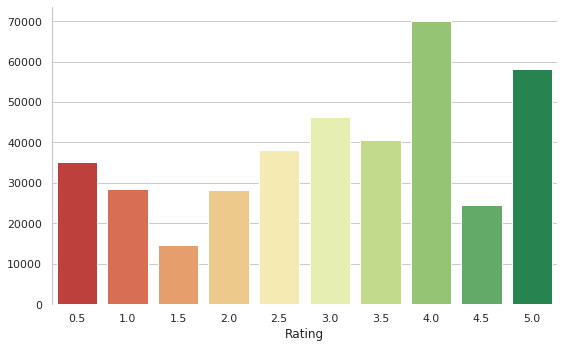

In [7]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=10)
goodbad_palette.reverse()

ax = sns.countplot(data=allocine_df, x='rating', palette=goodbad_palette)
ax.set(xlabel='Rating', ylabel='')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/rating_counts.png', dpi=200)

## Polarity

In [8]:
def find_polarity(row):
    if row['rating'] <= 2.0:
        return -1
    elif row['rating'] >= 4.0:
        return 1
    else:
        return 0

allocine_df['polarity'] = allocine_df.apply(lambda row : find_polarity(row), axis=1) 

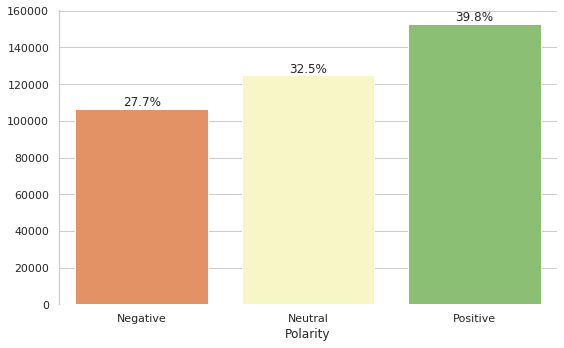

In [9]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=3)
goodbad_palette.reverse()

ax = sns.countplot(data=allocine_df, x='polarity', palette=goodbad_palette)
ax.set(xlabel='Polarity', ylabel='')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

# Frenquencies
ncount = len(allocine_df)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/polarity_frequency.png', dpi=200)

## Reviews per year

In [10]:
allocine_df['date'] = pd.to_datetime(allocine_df['date'])
reviews_per_year = allocine_df.groupby(allocine_df['date'].dt.year).size()

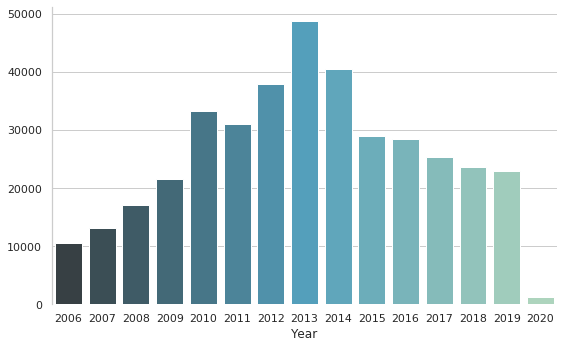

In [11]:
plt.figure(figsize=(8,5))
ax = sns.barplot(reviews_per_year.index, reviews_per_year.values, palette="GnBu_d")
ax.set(xlabel='Year', ylabel='')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/reviews_per_year.png', dpi=200)

## Reviews length

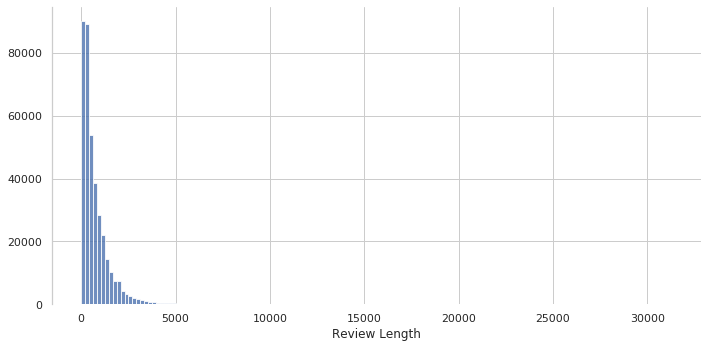

In [12]:
reviews_length = allocine_df['review'].str.len()

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/reviews_length.png', dpi=200)

In [13]:
THRESHOLD = 4000
short_reviews = allocine_df[allocine_df['review'].str.len() <= THRESHOLD]
long_reviews =  allocine_df[allocine_df['review'].str.len() > THRESHOLD]

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    len(long_reviews),
    THRESHOLD,
    100 * len(long_reviews) / len(allocine_df)
))

3956 reviews with LEN > 4000 (1.03 % of total data)


Example of a long review

In [14]:
long_reviews.head(1)

film-url  \
10  http://www.allocine.fr/film/fichefilm-265567/critiques/spectateurs   

    rating  \
10  2.5      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

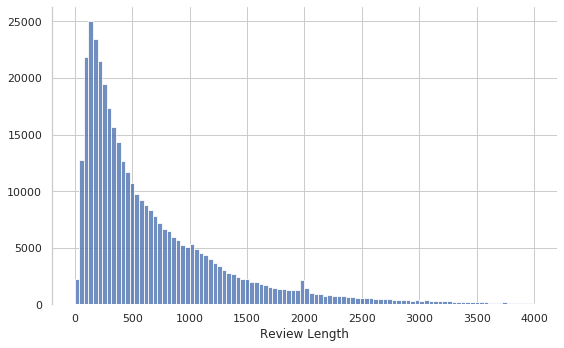

In [15]:
short_reviews_length = short_reviews['review'].str.len()

plt.figure(figsize=(8,5))
ax = sns.distplot(short_reviews_length, bins=100, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/short_reviews_length.png', dpi=200)

In [ ]:
# TODO: other analysis ?
# Histograms of reviews lengths for each rating (negative reviews are shorter ?)

In [ ]:
# Num reviews per film ? => why are we limiting to 30 reviews per film ?

# Build dataset

In [16]:
dataset_df = allocine_df.copy()
initial_len = len(dataset_df)
print("Length: {}".format(initial_len))

Length: 384079


## Remove data we don't need 

In [17]:
def loss_percentage(df, previous_length):
    new_length = len(df)
    percentage = 100*(1-(new_length/previous_length))    
    return new_length, percentage  

In [18]:
# 1. Drop columns we don't need
dataset_df = dataset_df.drop(columns=['rating', 'date', 'helpful', 'unhelpful'])

# 2. Drop rows we don't need (neutral polarity)
dataset_df = dataset_df[dataset_df['polarity'] != 0]
length, percentage = loss_percentage(dataset_df, initial_len)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# 3. Remove long reviews
LENGTH_THRESH = 4000
dataset_df = dataset_df[dataset_df['review'].str.len() <= LENGTH_THRESH]
length, percentage = loss_percentage(dataset_df, length)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# 4. Limit number of reviews per film
"""
MAX_REVIEWS_PER_FILM = 30
grouped = dataset_df.groupby('film-url')
for ids in grouped.groups.values():
    num_reviews = len(ids)    
    if num_reviews > MAX_REVIEWS_PER_FILM:
        sampling_size = num_reviews - MAX_REVIEWS_PER_FILM
        ids_to_drop = random.sample(list(ids), sampling_size)
        dataset_df = dataset_df.drop(ids_to_drop)
        
length, percentage = loss_percentage(dataset_df, length)
print("Length: {} (-{:.1f} %)".format(length, percentage))
"""
# Total loss
length, percentage = loss_percentage(dataset_df, initial_len)
print("Total loss: (-{:.1f} %)".format(percentage))

Length: 259210 (-32.5 %)
Length: 256353 (-1.1 %)
Total loss: (-33.3 %)


In [19]:
dataset_df.groupby('polarity').size()

polarity
-1    105687
 1    150666
dtype: int64

## Clean review text

In [20]:
import re

def clean_text(text):
    text = text.replace('\xa0', ' ')
    text = text.replace('\x92', "'")
    
    # Substituting multiple spaces with single space
    # Also remove '\n' and '\r' occurences
    text= re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text
 
dataset_df['review'] = dataset_df['review'].apply(clean_text)

In [21]:
dataset_df.sample(5, random_state=42)

,film-url,review,polarity
336107,http://www.allocine.fr/film/fichefilm-9975/critiques/spectateurs,"Film mèconnu, ""Cold Fever"" de Fridrik Thor Fridriksson est pourtant un road movie initiatique plein d'humanitè et d'humour! L'argument est original, un jeune japonais (Masatoshi Nagase, impeccable) tente de rejoindre une règion isolèe d'Islande où sont morts ses parents! Sorti discrètement aux States en 1996 (le film a ètè tournè en 1995), c'est une brise d'air frais qui fait du bien et qui donne du baume au coeur parce qu'on aime ce merveilleux pays qu'est l'Islande avec sa nature et ses coutumes, mais surtout parce qu'on s'attache à son personnage principal qui donne ce qu'il faut de mystère pour qu'on ait envie de le suivre à travers ce voyage pas comme les autres puisqu'il est limite surrèaliste! De plus on y retrouve brièvement une actrice rare et formidable, Lili Taylor, dont la spontanèitè et la fraîcheur a sèduit immanquablement le cinèma hollywoodien! Une belle rèussite avec une atmosphère unique...",1
163786,http://www.allocine.fr/film/fichefilm-26667/critiques/spectateurs,"Le film commence bizarrement pour un western, mais la suite se comprend aisément. Il est assez inhabituel de trouver Gregory Peck dans un rôle de mauvais et cynique garçon . King Vidor nous livre un petit chef-d'œuvre bâti sur un solide scénario où les scènes s'enchaînent pour le plus grand plaisir du spectateur. D'abord, les couleurs et les différentes mises en scène renforcent l'atmosphère de chaque séquence, les plus belles se présentant sous un ciel chargé. Ensuite, les différents déroulements offrent leur lot de satisfaction : le cheval de Pearl qui s'emballe rattrapé par Lewt McCanles, la scène avec le pasteur particulièrement cocasse, le regroupement des cowboys sous un ciel de traîne pour empêcher le chemin de fer de traverser les terres du ranch, la confrontation permanente entre les deux frères Lewt (Gregory Peck) et Jesse (Joseph Cotten), l'intransigeance du vieux sénateur plus têtu qu'une bourrique. Certaines scènes sont mémorables comme celle du dressage du cheval par Lewt ou de la mort de Laura Belle au pied du fauteuil roulant du sénateur. Les sentiments et les caractères sont très bien dessinés : le cynisme des uns, la loyauté des autres, sans oublier la versatilité féminine. Seule fausse note, le doublage de la servante noire est assez désagréable, pourquoi lui avoir donné une voix aigue et puérile ! Le ciel rouge du début et de la fin rend le spectacle d'une beauté indicible. Un des meilleurs westerns de tous les temps. Du grand, du très grand cinéma.",1
129434,http://www.allocine.fr/film/fichefilm-244123/critiques/spectateurs,Une très belle comédie poétique de Ramzy Bedia sur nos solitudes respectives. Formé à l'univers absurde de Quentin Dupieux nous retrouvons ici un brouillage des cartes géographiques avec un environnement nord-américain et d'autres éléments de décor français. Un soin apporté jusqu'au plaques d'immatriculation qui contribuent à nous perdre pour mieux lâcher prise et ne pas résister à l'univers absurde que l'on nous propose. Une bonne distribution pour un beau film.,1
300182,http://www.allocine.fr/film/fichefilm-58132/critiques/spectateurs,"j'ai adoré le film, sans chichi, sans langue de bois, traite du handicap et de ses difficultés, tittof tiens ici un rôle dans lequel on ne l'attend pas et personnellement j'aime !",1
12827,http://www.allocine.fr/film/fichefilm-254187/critiques/spectateurs,"la sirene et le nounours. voila revenu la vraie comédie américaine, pleine de charme, c'est plus que ça, presque un film politique , une oeuvre courageuse et truculente on on s'amuse et réfléchi a la fois, tendre et grivois . les comédiens s'en donnent a coeur joie et Charlize est stupéfiante de beauté d'élégance et de maitrise de son rôle et le nounours séduisant dans sa drôlerie . que c'est bon de retrouver la vraie comédie du temps des géants du noir et blanc.",1


## Balance classes

In [22]:
# The overall distribution of labels is balanced (25k pos and 25k neg).
# We don't have to have train and testset perfectly balanced

balanced_df = dataset_df.copy()

MAX_REVIEWS_PER_POLARITY = 10000
# 4. Limit number of reviews per film
grouped = balanced_df.groupby('polarity')
for ids in grouped.groups.values():
    num_reviews = len(ids)    
    if num_reviews > MAX_REVIEWS_PER_POLARITY:
        sampling_size = num_reviews - MAX_REVIEWS_PER_POLARITY
        ids_to_drop = random.sample(list(ids), sampling_size)
        balanced_df = balanced_df.drop(ids_to_drop)

In [23]:
print(balanced_df.groupby('polarity').size())
balanced_df.sample(10, random_state=42)

polarity
-1    10000
 1    10000
dtype: int64


,film-url,review,polarity
201832,http://www.allocine.fr/film/fichefilm-3660/critiques/spectateurs,"Certainement le meilleur film de Wes Craven (comme par hasard aussi un des moins connu), cette histoire de vaudou est fascinante et l'intrigue menée à la perfection ; des rebondissements bien agencés, du suspense et du mystère et des scènes très prenantes. Un excellent film d'épouvante à découvrir.",1
38151,http://www.allocine.fr/film/fichefilm-6838/critiques/spectateurs,"Gérard Jugnot au sommet. Cette comédie humaine et sociale est forte, intelligente, drôle et dramatique. Jugnot réussit à rendre attachants de manière incroyable ces marginaux, qui sont brillamment joués par Ticky Holgado et Richard Bohringer. De plus, Jugnot metteur en scène est aussi bon que Jugnot acteur. Un exemple de comédie dramatique réussi.",1
163679,http://www.allocine.fr/film/fichefilm-126473/critiques/spectateurs,"Un ratage complet ! Un scénario plus que brouillon dans lequel on se perd facilement, une mise en scène médiocre et ce n'est pas l'avalanche de cadavre ou les scènes ""chocs"" qui arrangent quelque chose. Bref, on comprend très vite la raison du bide de cette réalisation.",-1
20357,http://www.allocine.fr/film/fichefilm-136181/critiques/spectateurs,"Avec une touche de féérie, Martin Scorsese réussi un divertissement honnête, mené par un scénario très délicat, qui nous montre les tendresses d'un dialogue des années 30. Équipe d'un casting cinq étoiles, avec Asa Butterfield et Chloë Grace Moretz, et d'une mise en scène ultra-dynamique. Hugo Cabret raconte une aventure émouvante au cœur de Paris. Magique et envoûtant. 5/5 *****",1
265300,http://www.allocine.fr/film/fichefilm-258369/critiques/spectateurs,"Ce film est excellent. De très bons et très beaux (!) acteurs, une trame historique intéressante, de belles photos du Piémont en hiver (un peu trop de brume, malgré tout), une intrigue intéressante qui fait la part belle à la quête individuelle, aux questions qui taraudent. Enfin, du cinéma italien. Merci.",1
228250,http://www.allocine.fr/film/fichefilm-28772/critiques/spectateurs,Le thriller commence plutôt bien (l'idée de départ est bonne) mais l'histoire devient rapidement absurde tant elle mange de crédibilité et le jeu d'acteur est correct sans plus. La fin est très prévisible.,-1
210544,http://www.allocine.fr/film/fichefilm-147753/critiques/spectateurs,un nanar de toute 1ère catégorie... peut-être même un chef-d'oeuvre du genre! ça vaut bien 4 ou 5 étoiles...heureusement que l'industrie du téléfilm à petit budget existe pour nous faire rêver de temps en temps avec un spectacle vraiment incroyable... et pourtant si parlant sur notre réalité. merci à eux pour nous exposer de façon aussi jubilatoire la profonde déchéance de nos sociétés contemporaines!,1
55563,http://www.allocine.fr/film/fichefilm-14539/critiques/spectateurs,Film marrant bien que parfois un peu lourd.Mais les acteurs sont tous au top avec leurs personnages respectif.,1
379580,http://www.allocine.fr/film/fichefilm-169940/critiques/spectateurs,Miki Manojlovic embarque le spectateur sur son tandem. Une interprétation remarquable pour un film qui met du baume au coeur.,1
152998,http://www.allocine.fr/film/fichefilm-204301/critiques/spectateurs,"Ce film est parfois drôle. Mais les quelques moments de drôlerie ne permettent pas d'oublier l'indigence du scénario, les lieux communs et les niaiseries proférées par des acteurs, plutôt bons par ailleurs. Son problème, c'est que les personnages lourds le sont vraiment (on a du mal à y déceler le second degré) et que les autres sont au mieux caricaturaux, au pire irréalistes. Ce sous-produit de l'humour british-beauf ne justifie certainement pas l'emballement des critiques de presse dont le moral doit être tombé bien bas pour encenser ce mariage à la rien du tout. Evitez de perdre votre temps : allez boire un verre avec des amis !",-1


## Split train/dev/test

In [24]:
TRAIN_RATIO = 0.6
DEV_RATIO = 0.2
TEST_RATIO = 0.2

total_size = len(balanced_df)

train_df = balanced_df.copy()
dev_df = pd.DataFrame()
test_df = pd.DataFrame()

while True:
    row = train_df.sample(1, random_state=42)
    url = row['film-url'].iloc[0]
    rows = train_df[train_df['film-url'] == url]
    if(len(dev_df) < DEV_RATIO * total_size):
        dev_df = dev_df.append(rows)
        train_df = train_df[train_df['film-url'] != url]        
    elif(len(test_df) < TEST_RATIO * total_size):
        test_df = test_df.append(rows)
        train_df = train_df[train_df['film-url'] != url]
    else:
        break

print("LEN TRAIN: " + str(len(train_df)))
print("LEN DEV: " + str(len(dev_df)))
print("LEN TEST: " + str(len(test_df)))

LEN TRAIN: 11996
LEN DEV: 4003
LEN TEST: 4001


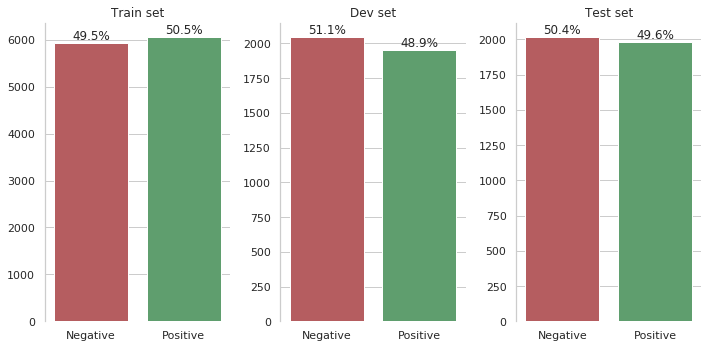

In [25]:
splits = [train_df, dev_df, test_df]
titles = ["Train set", "Dev set", "Test set"]

fig, ax = plt.subplots(1, len(splits), sharex=True, figsize=(10,5))
for i, (data, title) in enumerate(zip(splits, titles)):
    sns.countplot(data=data, x='polarity', palette=["r", "g"], ax=ax[i])
    ax[i].set(xlabel='', ylabel='')
    ax[i].set_xticklabels(['Negative', 'Positive']) 
    ax[i].set_title(title)
    
    # Frequencies
    ncount = len(data)
    for p in ax[i].patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax[i].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig.savefig('img/splits_polarity.png', dpi=200)

# Export

## To pickle

In [26]:
DATA_DIR = 'data'

In [27]:
import pickle

out_dict = {
    'train_set': train_df,
    'dev_set': dev_df,
    'test_set': test_df
}

pickle_file = os.path.join(DATA_DIR, "allocine_dataset.pickle")
with open(pickle_file, 'wb') as writer:
    pickle.dump(out_dict, writer)

In [28]:
with open(pickle_file, 'rb') as reader:
    data = pickle.load(reader)
    
print("LEN TRAIN: "+ str(len(data["train_set"])))
print("LEN DEV: "+ str(len(data["dev_set"])))
print("LEN TEST: "+ str(len(data["test_set"])))

LEN TRAIN: 11996
LEN DEV: 4003
LEN TEST: 4001


## To Jsonlines

In [29]:
import jsonlines

splits = [train_df, dev_df, test_df]
files = ["train.jsonl", "dev.jsonl", "test.jsonl"]

for split, file in zip(splits, files):
    export_file = os.path.join(DATA_DIR, file)
    with jsonlines.open(export_file, mode='w') as writer:
        for index, row in split.iterrows():        
            writer.write({
                "film-url": row["film-url"],
                "review": row["review"],
                "polarity": row["polarity"]
            })

In [30]:
import tarfile

with tarfile.open("data.tar.bz2", "w:bz2") as tar:
    tar.add(DATA_DIR, arcname=os.path.basename(DATA_DIR))